----------------------------------------------------------
## 1. Data ingestion & inspection

In [1]:
#1 - Data ingestion & Inspection

# Importing libraries; creating dataframe

import pandas as pd, numpy as np
df = pd.DataFrame(np.random.randn(4,4), columns = 'area size volume price'.split(), index = 'house1 house2 house3 house4'.split()).abs()
df

,area,size,volume,price
house1,0.051730,0.315748,0.033658,0.430201
house2,0.854367,0.470318,0.185107,0.335891
house3,0.531865,2.240922,2.135523,1.438736
house4,0.085109,0.308129,0.094517,0.154045


In [2]:
# Inspecionar dados:
# métodos df.head() e df.tail()

print(f'primeiros 5 valores:\n {df.head()} \n \n  últimos 5 valores: \n{df.tail()}')

primeiros 5 valores:
             area      size    volume     price
house1  0.051730  0.315748  0.033658  0.430201
house2  0.854367  0.470318  0.185107  0.335891
house3  0.531865  2.240922  2.135523  1.438736
house4  0.085109  0.308129  0.094517  0.154045 
 
  últimos 5 valores: 
            area      size    volume     price
house1  0.051730  0.315748  0.033658  0.430201
house2  0.854367  0.470318  0.185107  0.335891
house3  0.531865  2.240922  2.135523  1.438736
house4  0.085109  0.308129  0.094517  0.154045


In [3]:
# Checar tipos de dados no Dataframe
# df.info()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, house1 to house4
Data columns (total 4 columns):
area      4 non-null float64
size      4 non-null float64
volume    4 non-null float64
price     4 non-null float64
dtypes: float64(4)
memory usage: 160.0+ bytes


In [4]:
# statistics: método describe()

df.describe()

,area,size,volume,price
count,4.000000,4.000000,4.000000,4.000000
mean,0.380768,0.833779,0.612201,0.589718
std,0.384190,0.941067,1.017452,0.577499
min,0.051730,0.308129,0.033658,0.154045
25%,0.076764,0.313843,0.079302,0.290430
50%,0.308487,0.393033,0.139812,0.383046
75%,0.612491,0.912969,0.672711,0.682334
max,0.854367,2.240922,2.135523,1.438736


In [5]:
# Numpy e Pandas juntos
# df.values, np.log10(np.array)

nd_array = df.values
type(nd_array)
print(f'valores originais \n {df} \n \n somente os valores em log \n {np.log10(nd_array)} \n \n dataframe em log: \n {np.log10(df)} ')

valores originais 
             area      size    volume     price
house1  0.051730  0.315748  0.033658  0.430201
house2  0.854367  0.470318  0.185107  0.335891
house3  0.531865  2.240922  2.135523  1.438736
house4  0.085109  0.308129  0.094517  0.154045 
 
 somente os valores em log 
 [[-1.28625462 -0.50065965 -1.47290921 -0.36632908]
 [-0.06835564 -0.32760873 -0.73257661 -0.47380157]
 [-0.27419841  0.3504268   0.32950421  0.15798108]
 [-1.07002502 -0.51126786 -1.02449138 -0.8123511 ]] 
 
 dataframe em log: 
             area      size    volume     price
house1 -1.286255 -0.500660 -1.472909 -0.366329
house2 -0.068356 -0.327609 -0.732577 -0.473802
house3 -0.274198  0.350427  0.329504  0.157981
house4 -1.070025 -0.511268 -1.024491 -0.812351 


In [6]:
# Construir dataframes
# funções zip(), list()

keys = 'col1 col2 col3'.split()
values = [[1,2,3],[4,5,6],[7,8,9]]

dic = dict(zip(keys,values))
dic

df = pd.DataFrame(dic)
df


,col1,col2,col3
0,1,4,7
1,2,5,8
2,3,6,9


In [7]:
# Label data
#df.columns 

df.columns = 'um a três, quatro a seis, sete a nove'.split(',')
df

,um a três,quatro a seis,sete a nove
0,1,4,7
1,2,5,8
2,3,6,9


In [1]:
import pandas as pd, numpy as np

# criar quitanda, com vendas de um ano todo - criar dataframe, com index e dados
#index - calendário: todos os dias do ano
#colunas - 5, com valores aleatórios
np.random.seed(132) # fixar os números
df = pd.DataFrame(index = pd.date_range('2019/1/1','2019/12/31'), data=np.random.rand(365,4)*4)

# Renomear as colunas
df.columns = 'vendedor produtos preco_fruta  ud_vendidas'.split() #split() quebra um string em uma list
df.head()

# Coluna Vendedor:
##mudar tipo de variável, substituir valores
df.vendedor = df.vendedor.astype(int) #converte de flow para int
df.vendedor = df.vendedor.abs() # converte para valores absolutos
df.vendedor = df.vendedor.replace(2,1) #substitui valores
df.vendedor = df.vendedor.astype(str) #converte valores para string
df.vendedor = df.vendedor.replace('0','Heloise')
df.vendedor = df.vendedor.replace('1','Heloise')
df.vendedor = df.vendedor.replace('2','Sergio')
df.vendedor = df.vendedor.replace('3','Sergio')
df.head()


# Manipular valores nas colunas: módulo .map()
df.produtos = df.produtos.astype(int).abs().astype(str)
df.produtos = df.produtos.map({'0':'maçã','1':'banana','2':'pera','3':'uva'})
df.head()


# Substituição seletiva: de acordo com linha e coluna
df.loc[df.produtos == 'pera', 'preco_fruta'] = 5
df.loc[df.produtos == 'maçã', 'preco_fruta'] = 10
df.loc[df.produtos  == 'uva', 'preco_fruta'] = 15
df.loc[df.produtos == 'banana', 'preco_fruta'] = 20
df.head()

# arredondar valor, alterar todos os valores da coluna
    # - alterar por soma 
df.ud_vendidas = df.ud_vendidas.round().astype(int)+1


# alterar todos os valores da coluna
    # - alterar por linha e coluna; multiplicação, elevar 
df.loc[df.produtos=='uva','ud_vendidas'] = df.loc[df.produtos=='uva','ud_vendidas']*3
df.loc[df.produtos=='maçã','ud_vendidas'] = df.loc[df.produtos=='maçã','ud_vendidas']**2
df.loc[df.produtos=='pera','ud_vendidas'] = df.loc[df.produtos=='pera','ud_vendidas']+2



#(para análises futuras) Criar coluna com temperaturas anuais
verao = np.random.binomial(37,0.7,92)
outono = np.random.binomial(30,0.7,91)
inverno = np.random.binomial(25,0.7,91)
primavera = np.random.binomial(30,0.7,91)
df['temperatura'] = np.concatenate([verao,outono,inverno,primavera])

#fazer preço da uva e da banana mudar com a temperatura
df.loc[((df.produtos=='uva')&(df.temperatura <= 20)),'ud_vendidas'] = df.loc[df.produtos=='uva','ud_vendidas']*4
df.loc[((df.produtos=='uva')&(df.temperatura > 20)),'ud_vendidas'] = df.loc[df.produtos=='uva','ud_vendidas']*1.5
df.loc[((df.produtos=='uva')&(df.temperatura > 28)),'ud_vendidas'] = df.loc[df.produtos=='uva','ud_vendidas']*0.5

df.loc[((df.produtos=='banana')&(df.temperatura <= 20)),'ud_vendidas'] = df.loc[df.produtos=='banana','ud_vendidas']*0.7
df.loc[((df.produtos=='banana')&(df.temperatura > 20)),'ud_vendidas'] = df.loc[df.produtos=='banana','ud_vendidas']*1
df.loc[((df.produtos=='banana')&(df.temperatura > 28)),'ud_vendidas'] = df.loc[df.produtos=='banana','ud_vendidas']*1.4

#tornar ud_vendidas em int
df.ud_vendidas = df.ud_vendidas.map(lambda x:round(x))
df.ud_vendidas = df.ud_vendidas.astype(int)

# Criar coluna
df['valor_total'] = df.preco_fruta*df.ud_vendidas

# Cliente para quem vendemos
#df['cliente'] = ''
df.loc[((df.produtos=='uva')&(df.temperatura >=20)),'cliente'] = 'Pedro'
df.loc[((df.produtos=='uva')&(df.temperatura < 20)), 'cliente'] = 'José'
df.loc[((df.produtos=='banana')&(df.ud_vendidas <= 5)), 'cliente'] = 'Ana'
df.loc[((df.produtos=='banana')&(df.ud_vendidas > 5)), 'cliente'] = 'Paulo'
df.loc[((df.produtos=='maçã')&(df.temperatura > 15)), 'cliente'] = 'Pedro'
df.loc[((df.produtos=='maçã')&(df.temperatura <= 15)), 'cliente'] = 'José'
df.loc[((df.produtos=='pera')&(df.valor_total < 40)), 'cliente'] = 'Ana'
df.loc[((df.produtos=='pera')&(df.valor_total >= 40)), 'cliente'] = 'Paulo'




# ajustar índice
df.index = pd.to_datetime(df.index)
df.sort_index(ascending=True, inplace=True)

# 10 - Salvar seu trabalho até o momento
df.to_excel('quitanda.xlsx')

df.head()

,vendedor,produtos,preco_fruta,ud_vendidas,temperatura,valor_total,cliente
2019-01-01,Sergio,banana,20.0,4,26,80.0,Ana
2019-01-02,Sergio,banana,20.0,2,27,40.0,Ana
2019-01-03,Sergio,uva,15.0,4,27,60.0,Pedro
2019-01-04,Heloise,maçã,10.0,9,26,90.0,Pedro
2019-01-05,Heloise,banana,20.0,2,26,40.0,Ana


In [2]:
df2 = df.groupby(['vendedor','cliente']).sum().reset_index()

lala = {x:y for x,y in zip(df.cliente,df.ud_vendidas)}
lala


{'Ana': 4, 'Pedro': 4, 'Paulo': 6, 'José': 24}

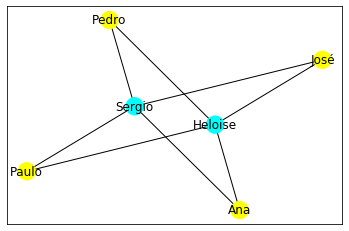

In [33]:
import matplotlib.pyplot as plt
import networkx as nx
Graphtype = nx.Graph()
x = nx.from_pandas_edgelist\
(df2,
 edge_attr='ud_vendidas',
 create_using=Graphtype,
 target='vendedor',
source = 'cliente')


nx.draw_networkx(x,node_color=['yellow','cyan','yellow','yellow','yellow','cyan'])


#nx.draw_networkx_edge_labels(x,pos)

In [21]:
# plotting Series
# %matplotlib inline --> substitutes several of matplot.pyplot functions
    #however, there are some workarounds...
    # no need for plt.show() :)

# ax = df.coluna.plot()
# ax.set_...
# pd.read_csv('arquivo.csv', index_col = 'col_name', 'parse_dates' = True)
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_excel('quitanda.xlsx')
print(df.head())

df = pd.read_excel('quitanda.xlsx', index_col='Unnamed: 0', parse_dates=True)
print(df.head())

  Unnamed: 0 vendedor produtos  preco_fruta  ud_vendidas  temperatura  \
0 2019-01-01   Sergio   banana           20            4           26   
1 2019-01-02   Sergio   banana           20            2           27   
2 2019-01-03   Sergio      uva           15            4           27   
3 2019-01-04  Heloise     maçã           10            9           26   
4 2019-01-05  Heloise   banana           20            2           26   

   valor_total cliente  
0           80     Ana  
1           40     Ana  
2           60   Pedro  
3           90   Pedro  
4           40     Ana  
           vendedor produtos  preco_fruta  ud_vendidas  temperatura  \
2019-01-01   Sergio   banana           20            4           26   
2019-01-02   Sergio   banana           20            2           27   
2019-01-03   Sergio      uva           15            4           27   
2019-01-04  Heloise     maçã           10            9           26   
2019-01-05  Heloise   banana           20            2  

Text(0.5, 1.0, 'Gastos da quitanda')

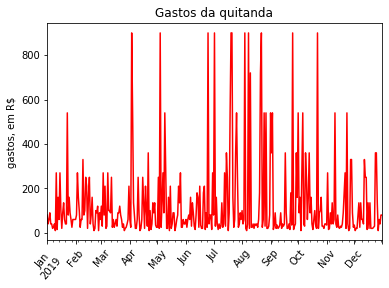

In [10]:
ax = df.valor_total.plot(color = 'red', rot=50)
ax.set_ylabel("gastos, em R$", )
ax.set_title('Gastos da quitanda')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Data columns (total 6 columns):
vendedor       365 non-null object
produtos       365 non-null object
preco_fruta    365 non-null int64
ud_vendidas    365 non-null int64
temperatura    365 non-null int64
valor_total    365 non-null int64
dtypes: int64(4), object(2)
memory usage: 20.0+ KB


Text(0.5, 0.98, '')

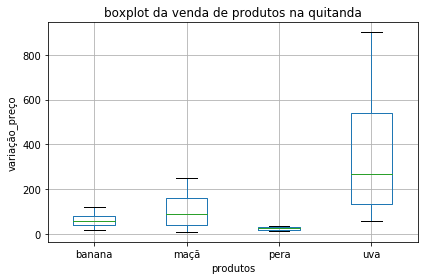

In [12]:
# Visualizing multiple variables with boxplots

df = pd.read_excel('quitanda.xlsx', index_col='Unnamed: 0', parse_dates = True)
ax = df.boxplot(column = 'valor_total', by= 'produtos')
ax.set_ylabel("variação_preço")
ax.set_title('boxplot da venda de produtos na quitanda')
plt.tight_layout()
plt.suptitle("") # removes the subtitle ('boxplot grouped by produtos')

Text(0.5, 1.0, 'Quitanda Sergio Heloise')

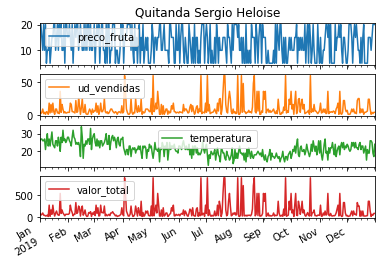

In [13]:
# Plotting DataFrames

ax = df.plot(subplots=True)
ax[0].set_title('Quitanda Sergio Heloise')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Data columns (total 6 columns):
vendedor       365 non-null object
produtos       365 non-null object
preco_fruta    365 non-null int64
ud_vendidas    365 non-null int64
temperatura    365 non-null int64
valor_total    365 non-null int64
dtypes: int64(4), object(2)
memory usage: 20.0+ KB


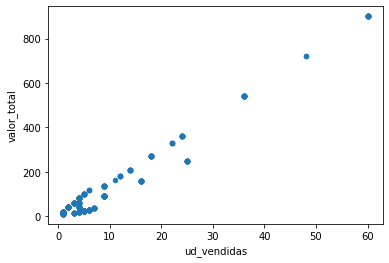

In [15]:
# Visualizing multiple variables with scatter plots

ax = df.plot(kind = 'scatter', y = 'valor_total', x = 'ud_vendidas')

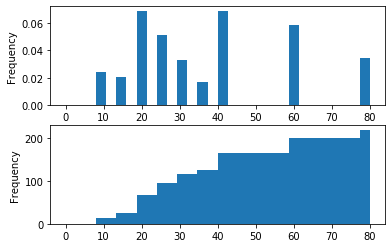

In [16]:
# Histograma, Probability Density Functions (PDF), Cumulative Density fuctions (CDF)

# to work with subplots, we have to import matplotlib.pyplot, no other way around...

import matplotlib.pyplot as plt


#1. Defining that there will be two different graphs as subplots
fig, axes = plt.subplots(nrows = 2, ncols = 1)

#2. Probability density function
df.valor_total.plot(ax = axes[0], kind = 'hist', bins = 30, density = True, range = (0,80) )

#3. Cumulative Density function
df.valor_total.plot(ax = axes[1], kind = 'hist', cumulative = True, range = (0,80), bins = 30)

In [17]:
# Histogram, Cumulative Density fuctions (CDF)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Data columns (total 6 columns):
vendedor       365 non-null object
produtos       365 non-null object
preco_fruta    365 non-null int64
ud_vendidas    365 non-null int64
temperatura    365 non-null int64
valor_total    365 non-null int64
dtypes: int64(4), object(2)
memory usage: 20.0+ KB


## Statistical Exploratory Data Analysis

In [18]:
# método min(), max(), mean()

pd.read_excel('quitanda.xlsx', index_col='Unnamed: 0', parse_dates=True)

print(f'mínimo: {df.min()} \n\n máximo: {df.max()} \n\n média: {df.mean()}' )

mínimo: vendedor       Heloise
produtos        banana
preco_fruta          5
ud_vendidas          1
temperatura         12
valor_total         10
dtype: object 

 máximo: vendedor       Sergio
produtos          uva
preco_fruta        20
ud_vendidas        60
temperatura        34
valor_total       900
dtype: object 

 média: preco_fruta     12.821918
ud_vendidas     10.104110
temperatura     21.479452
valor_total    132.301370
dtype: float64


In [19]:
#[extra: limpeza de dados]
# Notar o 'inf' no preco_unitário: significa 'infinite', tipo np.inf
#remover o inf e substituir por np.nan:
df.replace(np.inf, np.nan, inplace=True)

print(df.mean())

preco_fruta     12.821918
ud_vendidas     10.104110
temperatura     21.479452
valor_total    132.301370
dtype: float64


In [20]:
# método describe(): estatísticas básicas completas

df.describe()

,preco_fruta,ud_vendidas,temperatura,valor_total
count,365.000000,365.00000,365.000000,365.000000
mean,12.821918,10.10411,21.479452,132.301370
std,5.679978,12.36199,3.901640,186.256255
min,5.000000,1.00000,12.000000,10.000000
25%,10.000000,3.00000,19.000000,25.000000
50%,15.000000,5.00000,21.000000,60.000000
75%,20.000000,11.00000,24.000000,160.000000
max,20.000000,60.00000,34.000000,900.000000


In [21]:
#estatísticas: quantis, contar ocorrências

cont = df.produtos.count()
quartil005_095 = df.valor_total.quantile([0.05,0.95])
print(f'contagem de ocorrências:\n{cont} \n\nquartis valor vendas, 5% e 95%:\n{quartil005_095}')



contagem de ocorrências:
365 

quartis valor vendas, 5% e 95%:
0.05     15.0
0.95    540.0
Name: valor_total, dtype: float64


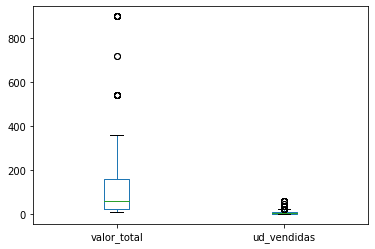

In [22]:
# estatística: visualizar colunas específicas

df[['valor_total','ud_vendidas']].plot(kind='box')

In [23]:
#estatística: desvio padrão
df.std()

preco_fruta      5.679978
ud_vendidas     12.361990
temperatura      3.901640
valor_total    186.256255
dtype: float64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Data columns (total 6 columns):
vendedor       365 non-null object
produtos       365 non-null object
preco_fruta    365 non-null int64
ud_vendidas    365 non-null int64
temperatura    365 non-null int64
valor_total    365 non-null int64
dtypes: int64(4), object(2)
memory usage: 20.0+ KB


###  Separating populations with boolean indexing

In [25]:
# Pegar a lista de produtos únicos:
df.produtos.value_counts()

banana    101
uva        93
pera       89
maçã       82
Name: produtos, dtype: int64

In [26]:
#calcular a soma total e a média de frutas vendidas

#soma de goiabas:
soma_goiabas = df[df.produtos=='goiaba']['ud_vendidas'].sum()
soma_vendas = df['ud_vendidas'].sum()
media_goiabas = df[df.produtos=='goiaba']['ud_vendidas'].mean()
desv_pad = df[df.produtos=='goiaba']['ud_vendidas'].std()

print(f' foram vendidas {soma_goiabas} goiabas. \n Foram vendidos {soma_vendas} frutas. \n A média de vendas de goiabas foi {media_goiabas}')
print(f' O desvio padrão das vendas foi {desv_pad}')

 foram vendidas 0 goiabas. 
 Foram vendidos 3688 frutas. 
 A média de vendas de goiabas foi nan
 O desvio padrão das vendas foi nan


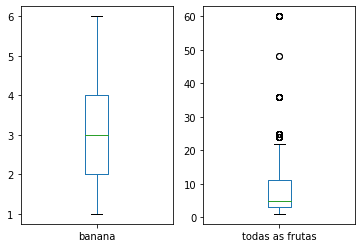

In [27]:
# separar e plotar
#tem que importar matplotlib.pyplot as plt antes

fig, axes = plt.subplots(nrows = 1, ncols = 2)
df[df['produtos']=='banana'].plot(ax = axes[0], y = 'ud_vendidas', kind = 'box', label = 'banana')
df.plot(ax=axes[1],y = 'ud_vendidas', kind = 'box', label = 'todas as frutas')


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Data columns (total 6 columns):
vendedor       365 non-null object
produtos       365 non-null object
preco_fruta    365 non-null int64
ud_vendidas    365 non-null int64
temperatura    365 non-null int64
valor_total    365 non-null int64
dtypes: int64(4), object(2)
memory usage: 20.0+ KB


Text(0.5, 1.0, 'venda todas as frutas')

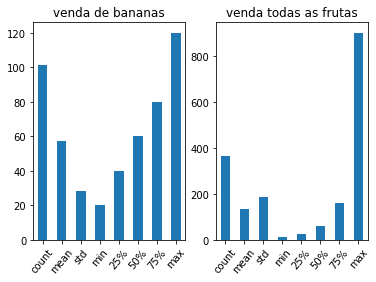

In [29]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
a1 = df[df.produtos=='banana'].valor_total.describe().plot(kind='bar', ax = axes[0], rot=50)
a1.set_title('venda de bananas')
a2 = df.valor_total.describe().plot(kind='bar', ax = axes[1], rot=50)
a2.set_title('venda todas as frutas')




Text(0.5, 1.0, 'Heloise venda de bananas')

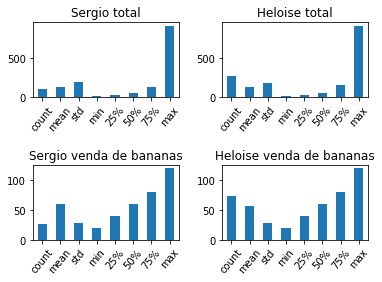

In [30]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
a1 = df[df.vendedor == 'Sergio'].valor_total.describe().plot(kind='bar', ax = axes[0,0], rot=50)
a2 = df[df.vendedor == 'Heloise'].valor_total.describe().plot(kind='bar', ax = axes[0,1], rot=50)
a3 = df[(df.vendedor == 'Sergio')&(df.produtos=='banana')].valor_total.describe().plot(kind='bar', ax = axes[1,0], rot=50)
a4 = df[(df.vendedor == 'Heloise')&(df.produtos=='banana')].valor_total.describe().plot(kind='bar', ax = axes[1,1], rot=50)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.9)
a1.set_title('Sergio total')
a2.set_title('Heloise total')
a3.set_title('Sergio venda de bananas')
a4.set_title('Heloise venda de bananas')

### Creating and using a DatetimeIndex

In [31]:
df = pd.read_excel('quitanda.xlsx')
# Converter object em formato pd.datetime
df['data'] = pd.to_datetime(df['Unnamed: 0'], format='%d/%m/%y')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.set_index('data', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Data columns (total 6 columns):
vendedor       365 non-null object
produtos       365 non-null object
preco_fruta    365 non-null int64
ud_vendidas    365 non-null int64
temperatura    365 non-null int64
valor_total    365 non-null int64
dtypes: int64(4), object(2)
memory usage: 20.0+ KB


In [32]:
#slicing: pegar dados só de janeiro
jan = df.loc['jan-2019']
#pegar só duas semanas de março
duas_semanas = df.loc['01-mar-19':'15-mar-19'].head()
print(f'\n {jan} \n \n {duas_semanas}')


            vendedor produtos  preco_fruta  ud_vendidas  temperatura  \
data                                                                  
2019-01-01   Sergio   banana           20            4           26   
2019-01-02   Sergio   banana           20            2           27   
2019-01-03   Sergio      uva           15            4           27   
2019-01-04  Heloise     maçã           10            9           26   
2019-01-05  Heloise   banana           20            2           26   
2019-01-06  Heloise     maçã           10            4           27   
2019-01-07  Heloise   banana           20            1           21   
2019-01-08  Heloise     pera            5            5           26   
2019-01-09  Heloise     maçã           10            4           30   
2019-01-10  Heloise     maçã           10            1           23   
2019-01-11  Heloise      uva           15           18           27   
2019-01-12  Heloise     pera            5            3           23   
2019

In [33]:
# reindex: extender um índice com outro índice
# método df.reindex()

a = df.loc['jan/2019']
b = df.loc['feb/2019']

aa = a.reindex(df.index)
bb = b.reindex(df.index)



In [34]:
# resampling: agrupar dados

#agrupar por mês e tirar média:
df_mes = df.resample('2Q', closed='left').mean()
df_mes

#dá para agrupar por horas (ex: '6h') ou dias (ex: '2D')

,preco_fruta,ud_vendidas,temperatura,valor_total
data,,,,
2019-06-30,13.500000,8.411111,23.411111,109.944444
2019-12-31,12.119565,11.793478,19.576087,154.456522
2020-06-30,20.000000,4.000000,24.000000,80.000000


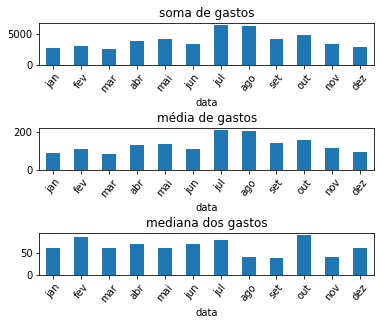

In [35]:
#agrupar e plotar
fig,axes = plt.subplots(nrows=3,ncols=1)
a = df['valor_total'].resample('M').sum().plot(kind='bar', ax = axes[0], rot=50)
b = df['valor_total'].resample('M').mean().plot(kind='bar', ax = axes[1], rot=50)
c = df['valor_total'].resample('M').median().plot(kind='bar', ax = axes[2], rot=50)

a.set_xticklabels('jan fev mar abr mai jun jul ago set out nov dez'.split())
a.set_title('soma de gastos')
c.set_title('mediana dos gastos')

b.set_title('média de gastos')
b.set_xticklabels('jan fev mar abr mai jun jul ago set out nov dez'.split())
c.set_xticklabels('jan fev mar abr mai jun jul ago set out nov dez'.split())

plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=0.3, hspace=1.5)

<br></br>
# Rolling Pandas
<img src="https://i.giphy.com/media/xkhn6Ry4taRtC/giphy.webp" onerror="this.onerror=null;this.src='https://i.giphy.com/xkhn6Ry4taRtC.gif';" alt="">

In [36]:
df1 = pd.DataFrame(list(range(1,6)), 
                  index = pd.date_range('2019/1/1','2019/1/5'), 
                  columns = ['dados'] )
df1.head()

,dados
2019-01-01,1
2019-01-02,2
2019-01-03,3
2019-01-04,4
2019-01-05,5


In [37]:
df1.rolling(2).mean()

,dados
2019-01-01,NaN
2019-01-02,1.5
2019-01-03,2.5
2019-01-04,3.5
2019-01-05,4.5


In [38]:
df1.rolling('2d').mean()

,dados
2019-01-01,1.0
2019-01-02,1.5
2019-01-03,2.5
2019-01-04,3.5
2019-01-05,4.5


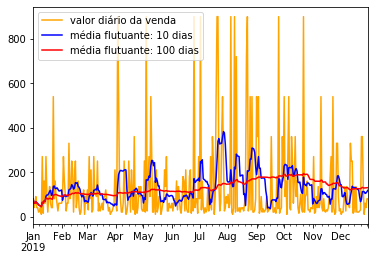

In [39]:
#média flutuante: rolling
#dados: todas as vendas do ano
df = pd.read_excel('quitanda.xlsx', index_col='Unnamed: 0', parse_dates=True)

df.valor_total.plot(color='orange', label='valor diário da venda')
df.valor_total.rolling(window='10d').mean().plot(color='blue', label='média flutuante: 10 dias')
df.valor_total.rolling(window='100d').mean().plot(color='red', label='média flutuante: 100 dias')
plt.legend()
plt.show()

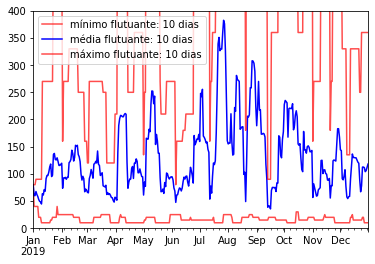

In [40]:
#média flutuante: rolling
#dados: todas as vendas do ano, mínima e máxima
df.valor_total.rolling(window='10d').min().plot(color='red', alpha=0.7, label='mínimo flutuante: 10 dias')
df.valor_total.rolling(window='10d').mean().plot(color='blue', label='média flutuante: 10 dias')
df.valor_total.rolling(window='10d').max().plot(color='red', alpha=0.7, label='máximo flutuante: 10 dias')
plt.legend()
plt.ylim([0,400])
plt.show()

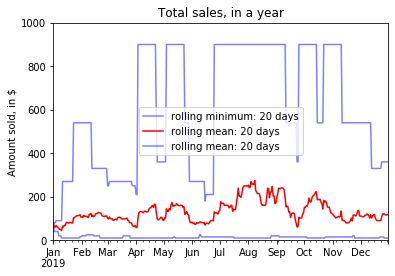

In [41]:
#média flutuante: rolling
#dados: todas as vendas do ano, mínima e máxima
df.valor_total.rolling(window='20d').min().plot(color='blue', alpha=0.5, label='rolling minimum: 20 days')
df.valor_total.rolling(window='20d').mean().plot(color='red', label='rolling mean: 20 days')
df.valor_total.rolling(window='20d').max().plot(color='blue', alpha=0.5, label='rolling mean: 20 days')
plt.legend()
plt.ylim([0,1000])
plt.ylabel('Amount sold, in $')
plt.title('Total sales, in a year')
plt.show()

In [42]:
total = df[['valor_total']].resample('M').sum()
mean = int(total.mean())
mean

4024

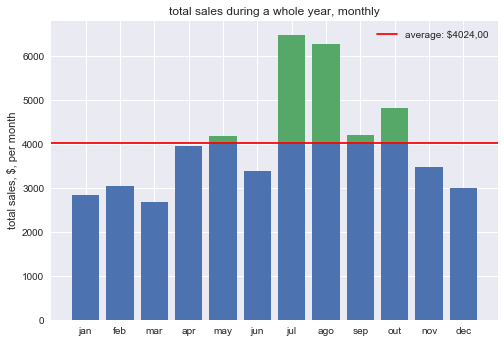

In [43]:
plt.style.use('seaborn')
total['above'] = ''
total['below'] = ''
total['below'] = [total.iloc[x,0] if total.iloc[x,0] < mean else mean for x in range(12)]
total['above'] = [(total.iloc[x,0] - mean) if (total.iloc[x,0] - mean)>= 0 else 0 for x in range(12) ]
#total.iloc[0,1] = total.iloc[0,0]
plt.plot([-1,13],[mean,mean], color='red', label=f'average: ${mean},00')
plt.bar(range(1,13),total.below)
plt.bar(range(1,13),total.above, bottom=total.below)
plt.xticks(list(range(1,13)), 'jan feb mar apr may jun jul ago sep out nov dec'.split(' '))
plt.xlim(0,13)
plt.ylabel('total sales, $, per month')
plt.title('total sales during a whole year, monthly')
plt.legend()

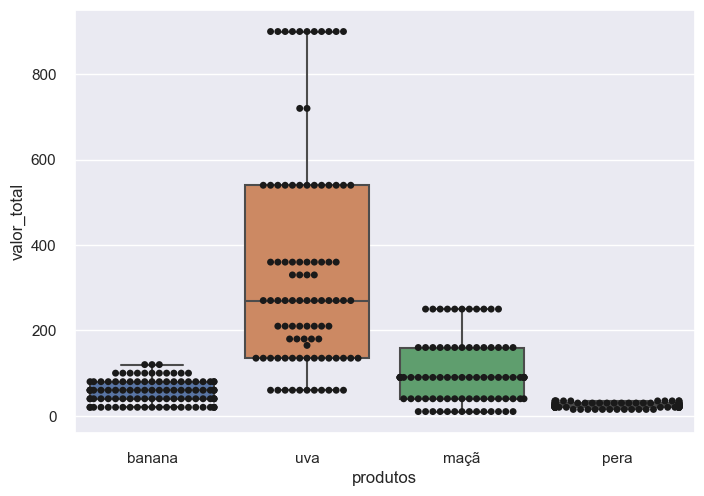

In [196]:
sns.set()
sns.boxplot(x = 'produtos', y = 'valor_total', data = df)
sns.swarmplot(x = 'produtos', y = 'valor_total', data = df, color = 'k')

Text(0.5, 0.98, 'coeficiente de correlação entre venda e temperatura')

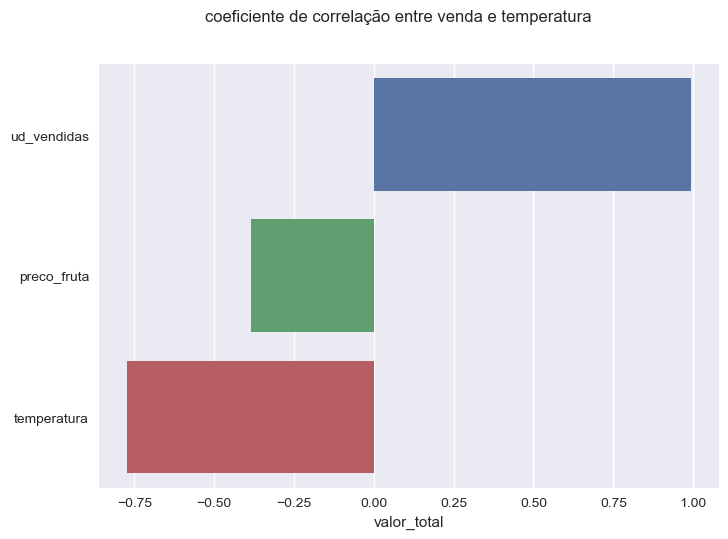

In [166]:
plt.style.use('seaborn')
lala = df.resample('M').mean().corr()['valor_total'].sort_values(ascending=False).drop('valor_total')
sns.barplot(y = lala.index, x=lala, orient='h')

plt.suptitle('coeficiente de correlação entre venda e temperatura')

In [45]:
#outros:
#remover espaço em caracteres: df.column.str.strip()

In [46]:
#outro modo de pegar colunas com dados específicos: método .str.strip()
#bom pra pegar células que contenham parte dos caracteres
df.produtos.str.contains('pera').head()

2019-01-01    False
2019-01-02    False
2019-01-03    False
2019-01-04    False
2019-01-05    False
Name: produtos, dtype: bool

In [47]:
#completar dados faltando:
df = pd.DataFrame({'nomes':['sergio','heloise','miu'],'salários':[1000, np.nan, 3000]})

print(f'salários antes: \n\n{df} \n\n tentando adivinhar: \n \n{df.salários.interpolate()}')

salários antes: 

     nomes  salários
0   sergio    1000.0
1  heloise       NaN
2      miu    3000.0 

 tentando adivinhar: 
 
0    1000.0
1    2000.0
2    3000.0
Name: salários, dtype: float64


In [48]:
#aplicar fómula em uma das colunas e salvar em outra coluna
df['letra_e_no_nome'] = df.nomes.apply(lambda x: x.count('e'))
df

#converter o número em caractere
df['letra_e_no_nome'] = df.letra_e_no_nome.astype(str)

#transformar caracteres em NaN: errors='coerce'
df

,nomes,salários,letra_e_no_nome
0,sergio,1000.0,1
1,heloise,NaN,2
2,miu,3000.0,0


In [49]:
df.nomes.str.capitalize()

0     Sergio
1    Heloise
2        Miu
Name: nomes, dtype: object

In [50]:
df.nomes.str.upper()

0     SERGIO
1    HELOISE
2        MIU
Name: nomes, dtype: object

  ## Tyding data for analysis

### Melt columns

In [51]:
df = pd.read_excel('quitanda.xlsx', index_col='Unnamed: 0', parse_dates=True)
df.head()

,vendedor,produtos,preco_fruta,ud_vendidas,temperatura,valor_total
2019-01-01,Sergio,banana,20,4,26,80
2019-01-02,Sergio,banana,20,2,27,40
2019-01-03,Sergio,uva,15,4,27,60
2019-01-04,Heloise,maçã,10,9,26,90
2019-01-05,Heloise,banana,20,2,26,40


In [52]:
#melt columns: transformar colunas (keys) em variáveis(values)
#método df.melt:
    #id_vars: selecione as colunas que deseja manter
    #value_vars: selecione as colunas que deseja transformar em variável
#no exemplo abaixo, as colunas 'preco_fruta','valor_total' e 'ud_vendidas'
#virarão variáveis de uma coluna nova, chamada 'medidas'

df = pd.read_excel('quitanda.xlsx', index_col='Unnamed: 0', parse_dates=True)
df.reset_index(inplace=True)
df2 = df.reset_index().melt(value_vars = ['index','vendedor','produtos','valor_total', 'preco_fruta'], 
                            var_name = 'medidas',
                            value_name='valor_total')
#df2.set_index('data',inplace=True)

# deixar os dados por data: método sort_index()

#df2.sort_index(inplace=True)
print(df2.shape)
print(df2.medidas.value_counts())
df2.head()

(1825, 2)
produtos       365
index          365
vendedor       365
valor_total    365
preco_fruta    365
Name: medidas, dtype: int64


,medidas,valor_total
0,index,2019-01-01 00:00:00
1,index,2019-01-02 00:00:00
2,index,2019-01-03 00:00:00
3,index,2019-01-04 00:00:00
4,index,2019-01-05 00:00:00


### Pivot data

In [53]:
#método pivot table: transformar variáveis em colunas
#transformar as variáveis 'preco_fruta','valor_total' e 'ud_vendidas' em colunas
#df.pivot_table()
    #index: colunas que devem ser mantidas
    #columns: coluna cujas variáveis devem virar colunas
    #values: coluna cujos valores serão distribuídos nas novas colunas
#método reset_index(): transforma o índice em colunas e cria um índice novo

df3 = df2.pivot(columns = 'medidas')
df3.head()

valor_total                                          
medidas                index preco_fruta produtos valor_total vendedor
0        2019-01-01 00:00:00         NaN      NaN         NaN      NaN
1        2019-01-02 00:00:00         NaN      NaN         NaN      NaN
2        2019-01-03 00:00:00         NaN      NaN         NaN      NaN
3        2019-01-04 00:00:00         NaN      NaN         NaN      NaN
4        2019-01-05 00:00:00         NaN      NaN         NaN      NaN

In [54]:
df.head()

,index,vendedor,produtos,preco_fruta,ud_vendidas,temperatura,valor_total
0,2019-01-01,Sergio,banana,20,4,26,80
1,2019-01-02,Sergio,banana,20,2,27,40
2,2019-01-03,Sergio,uva,15,4,27,60
3,2019-01-04,Heloise,maçã,10,9,26,90
4,2019-01-05,Heloise,banana,20,2,26,40


In [55]:
#usar pivot table pra gerar novas tabelas concisas
df4 = df.pivot_table(index = 'vendedor', columns = 'produtos', values=['ud_vendidas','valor_total'])
dft = df4.transpose()
dft

vendedor                 Heloise      Sergio
            produtos                        
ud_vendidas banana      2.797297    3.000000
            maçã        9.049180   12.285714
            pera        4.983051    4.933333
            uva        22.594203   24.541667
valor_total banana     55.945946   60.000000
            maçã       90.491803  122.857143
            pera       24.915254   24.666667
            uva       338.913043  368.125000

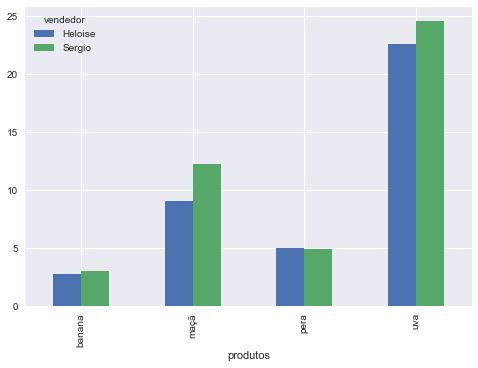

In [56]:
dft.loc['ud_vendidas'].plot(kind='bar', grid=True, subplots=False)

In [57]:
#método pivot table para variáveis duplicadas
#1. Criar dados duplicados:
df = pd.read_excel('quitanda.xlsx')
dfd = pd.concat([df,df], sort=True)
dfd.reset_index(inplace=True)
dfd.sort_values(by='index').head()

,index,Unnamed: 0,preco_fruta,produtos,temperatura,ud_vendidas,valor_total,vendedor
0,0,2019-01-01,20,banana,26,4,80,Sergio
365,0,2019-01-01,20,banana,26,4,80,Sergio
366,1,2019-01-02,20,banana,27,2,40,Sergio
1,1,2019-01-02,20,banana,27,2,40,Sergio
2,2,2019-01-03,15,uva,27,4,60,Sergio


##  Other small functions
#### .str.replace()  
#### .str.get()    


In [58]:
#splitting a column, dividir uma coluna e criar outra
import pandas as pd
ddf = pd.read_excel('quitanda.xlsx')

df['genero'] = df.vendedor.str[-1]
df['genero'] = df.genero.str.replace('o','masc')
df['genero'] = df.genero.str.replace('e','fem')
df.head()

,Unnamed: 0,vendedor,produtos,preco_fruta,ud_vendidas,temperatura,valor_total,genero
0,2019-01-01,Sergio,banana,20,4,26,80,masc
1,2019-01-02,Sergio,banana,20,2,27,40,masc
2,2019-01-03,Sergio,uva,15,4,27,60,masc
3,2019-01-04,Heloise,maçã,10,9,26,90,fem
4,2019-01-05,Heloise,banana,20,2,26,40,fem


In [59]:
#splitting a column 2: dividir a coluna data em dia, mes e ano
import pandas as pd
df = pd.read_excel('quitanda.xlsx')
df['data'] =  df['Unnamed: 0'].astype(str)

df['data'] = df.data.str.split('-')
df['dia'] = df.data.str.get(0)
df['mes'] = df.data.str.get(1)
df['ano'] = df.data.str.get(2)

del df['data']
df.head()

,Unnamed: 0,vendedor,produtos,preco_fruta,ud_vendidas,temperatura,valor_total,dia,mes,ano
0,2019-01-01,Sergio,banana,20,4,26,80,2019,01,01
1,2019-01-02,Sergio,banana,20,2,27,40,2019,01,02
2,2019-01-03,Sergio,uva,15,4,27,60,2019,01,03
3,2019-01-04,Heloise,maçã,10,9,26,90,2019,01,04
4,2019-01-05,Heloise,banana,20,2,26,40,2019,01,05


##  Combining rows of data

In [60]:
!dir()

 O volume na unidade E ‚ Storage1
 O N£mero de S‚rie do Volume ‚ 5601-FD56

 Pasta de E:\Users\Sergio\OneDrive\Python\notebooks



Arquivo nÆo encontrado


In [61]:
df1 = pd.DataFrame({'vendedores':'sergio heloise sergio sergio heloise'.split(),
                   'produtos':'gibi esmalte gibi gibi esmalte'.split(),
                   'preco':[20, 40, 18, 30, 50]})
df1.to_csv('concat1.csv')

In [62]:
df2 = pd.DataFrame({'vendedores':'sergio heloise sergio sergio heloise'.split(),
                   'produtos':'manga pó manga jogo lapis'.split(),
                   'preco':[20, 30, 10, 100,   5]})
df2.to_csv('concat2.csv')

In [63]:
df3 = pd.DataFrame({'vendedores':'miu heloise miu sergio'.split(),
                   'produtos': 'peixe reddit passarinho notebook'.split(),
                   'preco': [200,300,500,1000]})
df3.to_csv('concat3.csv')

In [64]:
#função concat: concatena colunas (axis = 0: linhas; axis = 1 : colunas)
row_concat = pd.concat([df1,df2,df3], sort=True)
row_concat

,preco,produtos,vendedores
0,20,gibi,sergio
1,40,esmalte,heloise
2,18,gibi,sergio
3,30,gibi,sergio
4,50,esmalte,heloise
0,20,manga,sergio
1,30,pó,heloise
2,10,manga,sergio
3,100,jogo,sergio
4,5,lapis,heloise


In [65]:
df4 = pd.DataFrame({'nomes':'sergio heloise sergio heloise heloise'.split(),
                   'produtos':'gibi esmalte gibi esmalte esmalte'.split()})
df5 = pd.DataFrame({'preco':[20, 40, 18, 30, 60],
                   'uds_vendidas':[2, 5, 10, 7, 6]})

In [66]:
col_concat = pd.concat([df4,df5], axis=1)
col_concat

,nomes,produtos,preco,uds_vendidas
0,sergio,gibi,20,2
1,heloise,esmalte,40,5
2,sergio,gibi,18,10
3,heloise,esmalte,30,7
4,heloise,esmalte,60,6


In [67]:
#concatenar todas as listas em uma pasta
import pandas as pd

df1 = pd.DataFrame()


import os
#os.chdir('c:\\a\\DataCamp\\concatenar')
frames = []
for csv in os.listdir():
    if 'csv' in csv:
        df = pd.read_csv(csv)
        frames.append(df)

lojinha = pd.concat(frames)
lojinha



,Unnamed: 0,vendedores,produtos,preco
0,0,sergio,gibi,20
1,1,heloise,esmalte,40
2,2,sergio,gibi,18
3,3,sergio,gibi,30
4,4,heloise,esmalte,50
0,0,sergio,manga,20
1,1,heloise,pó,30
2,2,sergio,manga,10
3,3,sergio,jogo,100
4,4,heloise,lapis,5


In [68]:
lojinha.pivot_table(index='vendedores',values='preco', aggfunc='sum')

,preco
vendedores,
heloise,425
miu,700
sergio,1198


##  Data Merge: mesclar duas tabelas diferentes com colunas similares

In [69]:
# Criar planilhas com colunas similares(nomes de vendedores)
df_left = pd.DataFrame({'nome':'sergio sergio heloise heloise miu miu'.split(),
                       'valor_venda':[10,20,30,20,50,70],
                        'produto':'jogo gibi esmalte pó passarinho sache'.split()})
df_right = pd.DataFrame({'vendedor':'sergio heloise miu'.split(),
                        'quota_mensal':[30, 10, 20],
                        'salario':[100, 300, 1000]})

#fundir tabelas: função pd.merge()
df_merged = pd.merge(left=df_left, 
                     right = df_right, 
                     left_on='nome', 
                     right_on='vendedor')
df_merged

,nome,valor_venda,produto,vendedor,quota_mensal,salario
0,sergio,10,jogo,sergio,30,100
1,sergio,20,gibi,sergio,30,100
2,heloise,30,esmalte,heloise,10,300
3,heloise,20,pó,heloise,10,300
4,miu,50,passarinho,miu,20,1000
5,miu,70,sache,miu,20,1000


# Extracting and manipulating data

### Positional and labeled indexing

In [70]:
#criar tabela: índice duplo, índices repetidos por entrada

import pandas as pd, os

df = pd.read_excel('quitanda.xlsx')
df['data'] =  df['Unnamed: 0']
df.drop('Unnamed: 0', axis=1, inplace=True)
df = df.melt(id_vars='data vendedor produtos'.split(), 
             value_name='faturamento',
            var_name='valor_total')
             
df['data'] = pd.to_datetime(df.data, format='%d/%m/%y')

#criar multiíndice
df.set_index('data valor_total'.split(), inplace=True)

#organizar o índice
df.sort_index(inplace=True)
df.head()

vendedor produtos  faturamento
data       valor_total                               
2019-01-01 preco_fruta   Sergio   banana           20
           temperatura   Sergio   banana           26
           ud_vendidas   Sergio   banana            4
           valor_total   Sergio   banana           80
2019-01-02 preco_fruta   Sergio   banana           20

In [71]:
# positional and labeled indexing:
# usar lista simples - isso é confuso pra caralho!!!
a = df.loc['2019-jan-01']
b = df.loc['2019-jan-01','preco_fruta']
print(f'imprimir o primeiro índice: \n\n{a} \n \n',
      f'imprimir o primeiro e segundo índice: \n\n{b}')


imprimir o primeiro índice: 

                       vendedor produtos  faturamento
data       valor_total                               
2019-01-01 preco_fruta   Sergio   banana           20
           temperatura   Sergio   banana           26
           ud_vendidas   Sergio   banana            4
           valor_total   Sergio   banana           80 
 
 imprimir o primeiro e segundo índice: 

vendedor       Sergio
produtos       banana
faturamento        20
Name: (2019-01-01 00:00:00, preco_fruta), dtype: object


In [72]:
##slicing datas: pegar índices específicos
#apenas o primeiro índice: normal

df.loc['2019-jan-01':'2019-jan-03']


vendedor produtos  faturamento
data       valor_total                               
2019-01-01 preco_fruta   Sergio   banana           20
           temperatura   Sergio   banana           26
           ud_vendidas   Sergio   banana            4
           valor_total   Sergio   banana           80
2019-01-02 preco_fruta   Sergio   banana           20
           temperatura   Sergio   banana           27
           ud_vendidas   Sergio   banana            2
           valor_total   Sergio   banana           40
2019-01-03 preco_fruta   Sergio      uva           15
           temperatura   Sergio      uva           27
           ud_vendidas   Sergio      uva            4
           valor_total   Sergio      uva           60

In [73]:
##slicing datas: pegar índices e colunas específicos
#pegar todas as colunas a esquerda até 'produtos' dos dias 1 ao 3
df.loc['2019-01-01':'2019-01-03',:'produtos']

vendedor produtos
data       valor_total                  
2019-01-01 preco_fruta   Sergio   banana
           temperatura   Sergio   banana
           ud_vendidas   Sergio   banana
           valor_total   Sergio   banana
2019-01-02 preco_fruta   Sergio   banana
           temperatura   Sergio   banana
           ud_vendidas   Sergio   banana
           valor_total   Sergio   banana
2019-01-03 preco_fruta   Sergio      uva
           temperatura   Sergio      uva
           ud_vendidas   Sergio      uva
           valor_total   Sergio      uva

##  Aplicar funções em dataframes

In [74]:
df.head()

vendedor produtos  faturamento
data       valor_total                               
2019-01-01 preco_fruta   Sergio   banana           20
           temperatura   Sergio   banana           26
           ud_vendidas   Sergio   banana            4
           valor_total   Sergio   banana           80
2019-01-02 preco_fruta   Sergio   banana           20

In [75]:
# função apply: criar funções e aplicar em seu dataframe
df = pd.read_excel('quitanda.xlsx')
df['data'] =  df['Unnamed: 0']

def em_reais(F):
    return (f'R${F},00')

df['Valor Total em R$'] = df['valor_total'].apply(em_reais)
df.head()


,Unnamed: 0,vendedor,produtos,preco_fruta,ud_vendidas,temperatura,valor_total,data,Valor Total em R$
0,2019-01-01,Sergio,banana,20,4,26,80,2019-01-01,"R$80,00"
1,2019-01-02,Sergio,banana,20,2,27,40,2019-01-02,"R$40,00"
2,2019-01-03,Sergio,uva,15,4,27,60,2019-01-03,"R$60,00"
3,2019-01-04,Heloise,maçã,10,9,26,90,2019-01-04,"R$90,00"
4,2019-01-05,Heloise,banana,20,2,26,40,2019-01-05,"R$40,00"


In [76]:
#função método map() dentro do dataframe

sexo = {'Sergio':'masc',
       'Heloise':'fem'}

df['sexo'] = df.vendedor.map(sexo)
df.head()

,Unnamed: 0,vendedor,produtos,preco_fruta,ud_vendidas,temperatura,valor_total,data,Valor Total em R$,sexo
0,2019-01-01,Sergio,banana,20,4,26,80,2019-01-01,"R$80,00",masc
1,2019-01-02,Sergio,banana,20,2,27,40,2019-01-02,"R$40,00",masc
2,2019-01-03,Sergio,uva,15,4,27,60,2019-01-03,"R$60,00",masc
3,2019-01-04,Heloise,maçã,10,9,26,90,2019-01-04,"R$90,00",fem
4,2019-01-05,Heloise,banana,20,2,26,40,2019-01-05,"R$40,00",fem


# Matplotlib: trabalhar com figuras e eixos

#### Disclaimer:
o que eu vou fazer aqui é, em termos brandos, não eficaz.  
Eu irei separar cada uma das colunas da quitanda como um numpy array.
Normalmente isso não é necessário.  
#### Seja inteligente. Use Pandas. Não use drogas.

In [77]:
import numpy as np, pandas as pd

df = pd.read_excel('quitanda.xlsx', index_col = 'Unnamed: 0', parse_index=True)

df.head()

,vendedor,produtos,preco_fruta,ud_vendidas,temperatura,valor_total
2019-01-01,Sergio,banana,20,4,26,80
2019-01-02,Sergio,banana,20,2,27,40
2019-01-03,Sergio,uva,15,4,27,60
2019-01-04,Heloise,maçã,10,9,26,90
2019-01-05,Heloise,banana,20,2,26,40


In [78]:
#importar a budega toda
import pandas as pd, matplotlib.pyplot as plt, numpy as np

#carregar a quitanda como df
df = pd.read_excel('quitanda.xlsx', index_col = 'Unnamed: 0', parse_index=True)

# separar as colunas em numpy arrays
indice = df.index.values
for col in df:
    globals()[col] = df[col].values
    print(col,globals()[col][0:5])
print('indice:',indice[0:5])

vendedor ['Sergio' 'Sergio' 'Sergio' 'Heloise' 'Heloise']
produtos ['banana' 'banana' 'uva' 'maçã' 'banana']
preco_fruta [20 20 15 10 20]
ud_vendidas [4 2 4 9 2]
temperatura [26 27 27 26 26]
valor_total [80 40 60 90 40]
indice: ['2019-01-01T00:00:00.000000000' '2019-01-02T00:00:00.000000000'
 '2019-01-03T00:00:00.000000000' '2019-01-04T00:00:00.000000000'
 '2019-01-05T00:00:00.000000000']


In [79]:
indice = []
for x in range(len(df.index.values)):
    indice.append(str(df.index.values[x]).split('T')[0])
indice[0:5]    

['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05']

### Sites: marcadores e linhas
https://matplotlib.org/3.1.0/api/markers_api.html  
https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html

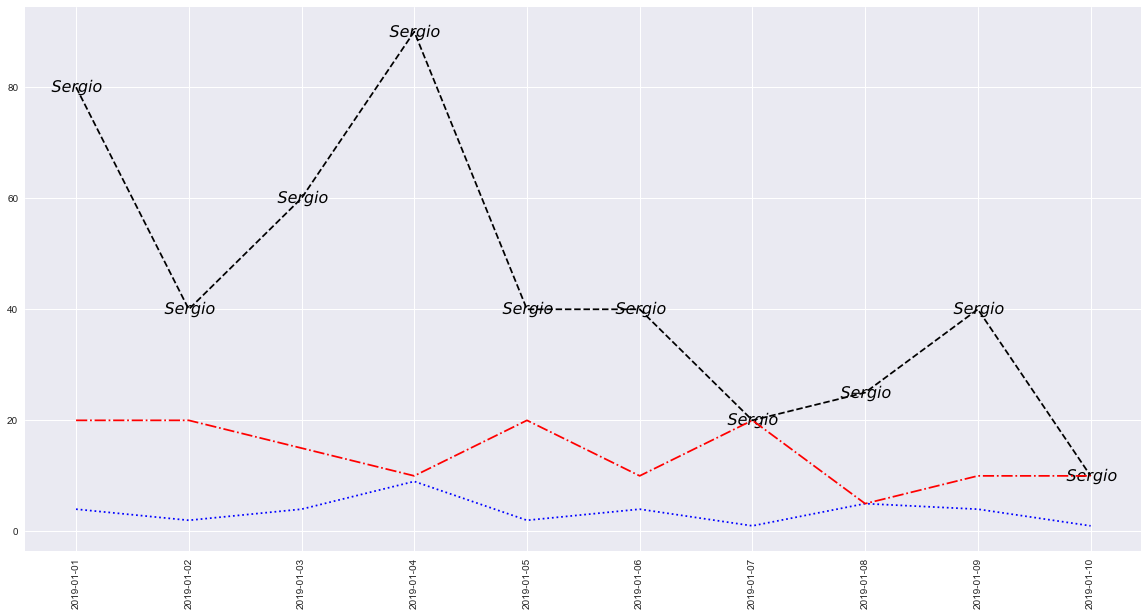

In [80]:
#vários gráficos em um par de eixos

#plt.plot(x_axis, y_axis, marker= 'ver_markers', color='cor', linestyle='ver linestyles')
plt.figure(figsize=(20,10))
plt.plot(indice[0:10],valor_total[0:10], marker='$Sergio$', linestyle = '--',markersize=50, color='k' )
plt.plot(indice[0:10],ud_vendidas[0:10],marker='1', linestyle = ':' , markersize=20, color='b')
plt.plot(indice[0:10],preco_fruta[0:10],marker='3', linestyle = '-.', markersize=20 , color='red')
plt.xticks(rotation=90)

plt.show()

In [81]:
valor_total_sergio = df[df.vendedor=='Sergio'].valor_total.values
valor_total_heloise = df[df.vendedor=='Heloise'].valor_total.values
vendedores = np.array((valor_total_sergio,valor_total_heloise))

print(valor_total_sergio[0:5])
print(valor_total_heloise[0:5])
print(vendedores.shape)

[ 80  40  60 135  60]
[90 40 40 20 25]
(2,)


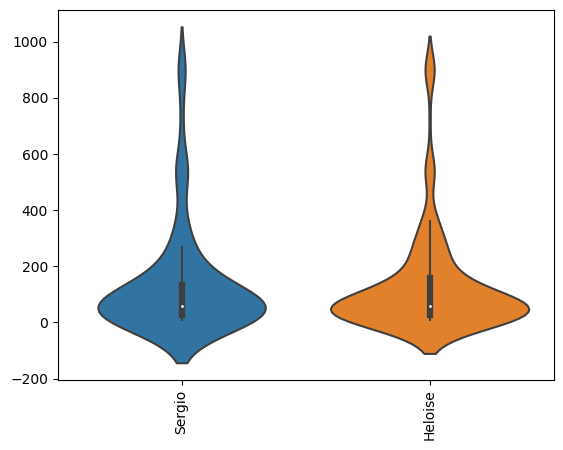

In [82]:
import seaborn as sns
plt.style.use('default')
#plt.boxplot(vendedores)
sns.violinplot(data=vendedores)
plt.xticks(ticks=[0,1],labels=['Sergio','Heloise'], rotation=90)


plt.box(on=True)

([<matplotlib.axis.XTick at 0x241fa60cd30>,
 <a list of 2 Text xticklabel objects>)

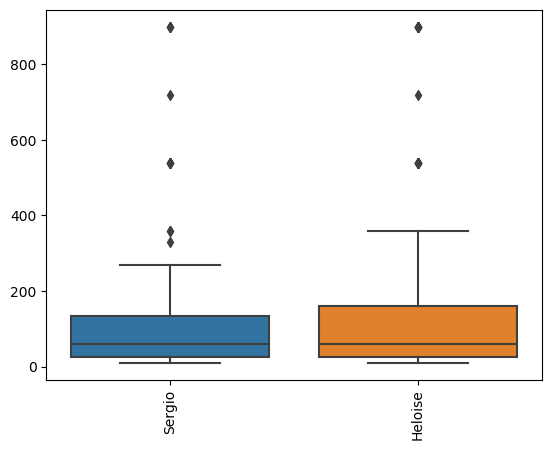

In [83]:
#sns.swarmplot(data=vendedores, color='black')
sns.boxplot(data=vendedores)
plt.xticks(ticks=[0,1],labels=['Sergio','Heloise'], rotation=90)

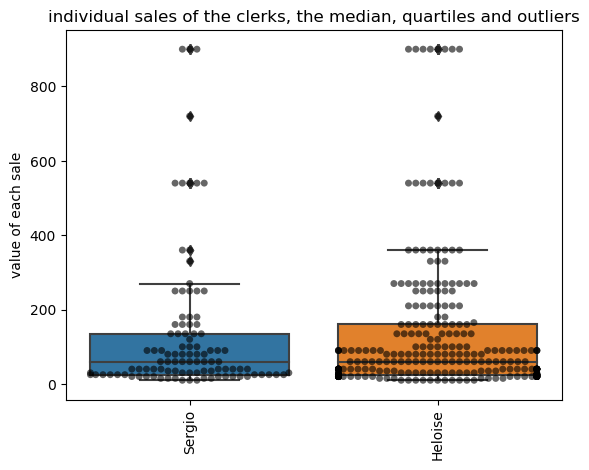

In [84]:
sns.swarmplot(data=vendedores, color='black', alpha=.6)
sns.boxplot(data=vendedores)
plt.xticks(ticks=[0,1],labels=['Sergio','Heloise'], rotation=90)
plt.ylabel('value of each sale')
plt.title('individual sales of the clerks, the median, quartiles and outliers')
plt.show()

([<matplotlib.axis.XTick at 0x241fa58b3c8>,
 <a list of 2 Text xticklabel objects>)

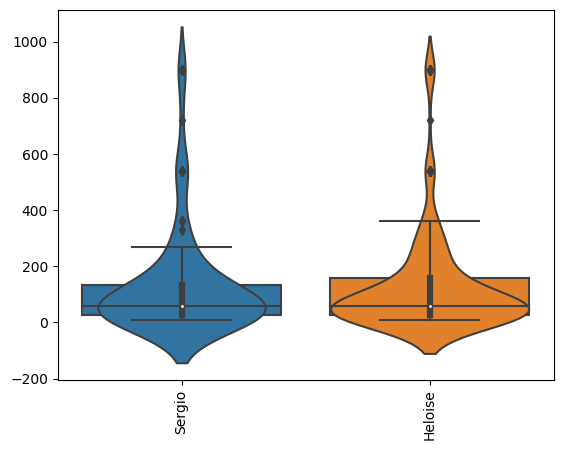

In [85]:
sns.violinplot(data=vendedores)
sns.boxplot(data=vendedores)
plt.xticks(ticks=[0,1],labels=['Sergio','Heloise'], rotation=90)

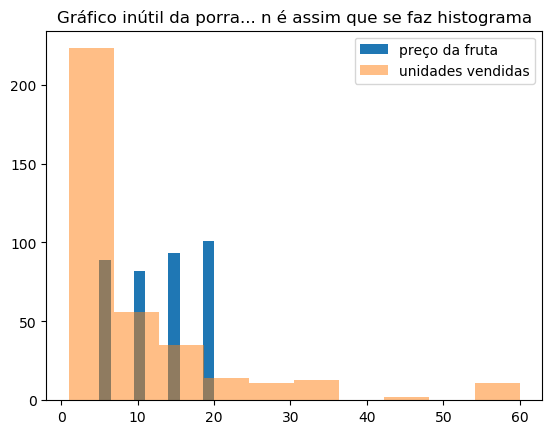

In [86]:
'''Relembrando:
vendedor ['Sergio' 'Sergio' 'Sergio' 'Heloise' 'Heloise']
produtos ['banana' 'banana' 'uva' 'maçã' 'banana']
preco_fruta [20 20 15 10 20]
ud_vendidas [4 2 3 9 2]
valor_total [80 40 45 90 40]'''

plt.hist(preco_fruta, label='preço da fruta')
plt.hist(ud_vendidas, alpha=0.5, label='unidades vendidas')
plt.title('Gráfico inútil da porra... n é assim que se faz histograma')
plt.legend()

In [87]:
sorted(np.bincount(valor_total), reverse=True)[0]

40

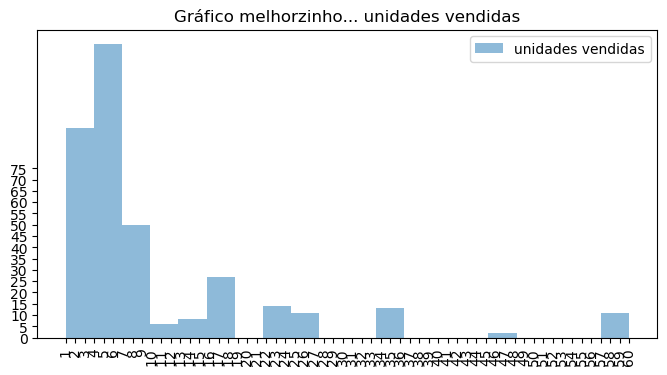

In [88]:
'''Relembrando:
vendedor ['Sergio' 'Sergio' 'Sergio' 'Heloise' 'Heloise']
produtos ['banana' 'banana' 'uva' 'maçã' 'banana']
preco_fruta [20 20 15 10 20]
ud_vendidas [4 2 3 9 2]
valor_total [80 40 45 90 40]'''

plt.figure(figsize=(8,4))
plt.hist(ud_vendidas, bins=20, alpha=0.5, label='unidades vendidas')
plt.title('Gráfico melhorzinho... unidades vendidas')
plt.xticks(np.arange(min(ud_vendidas), max(ud_vendidas)+1, 1.0), rotation=90)
plt.yticks(np.arange(0,sorted(np.bincount(ud_vendidas), reverse=True)[0]+10,5))
plt.legend()

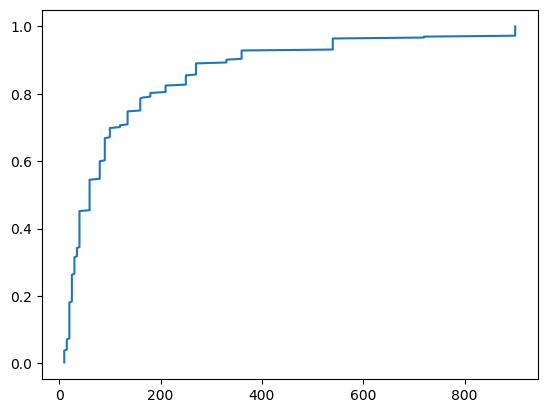

In [89]:
#Cumulative Density Function, ou histograma com cumulative habilitado


def cdf(dado):
    x = np.sort(dado) #valores ordenados
    y = np.arange(1,len(dado)+1)/len(dado) #frequência de cada valor
    return(x,y)
a,b = cdf(valor_total)
plt.plot(a,b)

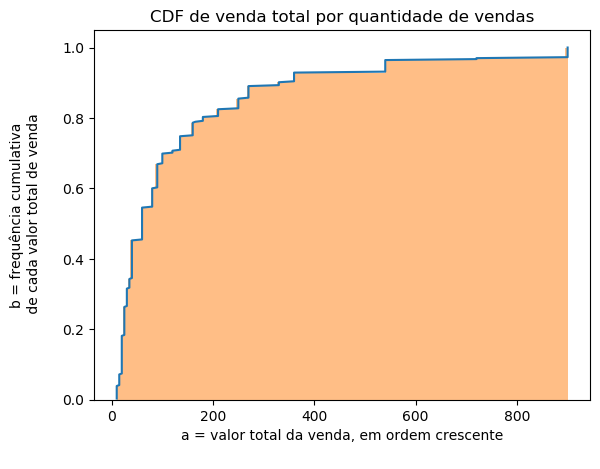

In [90]:
plt.cla()
plt.plot(a,b)
plt.hist(valor_total, cumulative=True, bins=200, alpha=0.5, density=True )
plt.xlabel('a = valor total da venda, em ordem crescente\n')
plt.ylabel('b = frequência cumulativa\n de cada valor total de venda\n')
plt.title('CDF de venda total por quantidade de vendas')
plt.show()

# Estatística básica: média, desvio padrão e quartis

In [91]:
df = pd.read_excel('quitanda.xlsx', index_col=0)
df.head()

,vendedor,produtos,preco_fruta,ud_vendidas,temperatura,valor_total
2019-01-01,Sergio,banana,20,4,26,80
2019-01-02,Sergio,banana,20,2,27,40
2019-01-03,Sergio,uva,15,4,27,60
2019-01-04,Heloise,maçã,10,9,26,90
2019-01-05,Heloise,banana,20,2,26,40


In [92]:
valor_total = df.valor_total.values
type(valor_total)

numpy.ndarray

In [93]:
#média


In [94]:
#desvio padrão


média: 132.3013698630137
 erro: 186.00093422445508


Text(0.5, 1.0, 'Valor total das vendas. Desvio padrão\n e percentis 25 e 75%!')

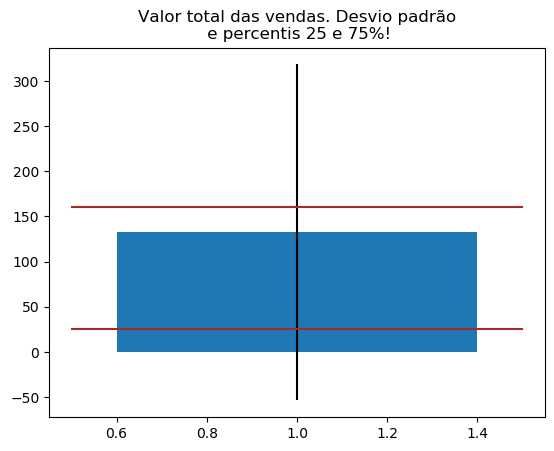

In [95]:
print(f'média: {np.mean(valor_total)}\n erro: {np.std(valor_total)}' )

plt.bar(1,np.mean(valor_total), yerr = np.std(valor_total))
percentis = np.percentile(valor_total,[25,75])
plt.plot([0.5,1.5],[percentis[0],percentis[0]], color='brown')
plt.plot([0.5,1.5],[percentis[1],percentis[1]], color='brown')
plt.title('Valor total das vendas. Desvio padrão\n e percentis 25 e 75%!')

# Coeficiente de variação e Pearson
### Existe alguma relação entre a venda das frutas por mês?

In [96]:
banana_mask = df.produtos=='banana'
maca_mask = df.produtos=='maçã'
uva_mask = df.produtos=='uva'
pera_mask = df.produtos=='pera'

df.head(1)

,vendedor,produtos,preco_fruta,ud_vendidas,temperatura,valor_total
2019-01-01,Sergio,banana,20,4,26,80


In [97]:
banana= df[banana_mask].resample('M').sum()['valor_total']
maca= df[maca_mask].resample('M').sum()['valor_total']
uva= df[uva_mask].resample('M').sum()['valor_total']
pera= df[pera_mask].resample('M').sum()['valor_total']
temperatura = df.resample('M').mean()['temperatura']
temperatura

2019-01-31    25.838710
2019-02-28    25.642857
2019-03-31    25.645161
2019-04-30    21.033333
2019-05-31    21.064516
2019-06-30    21.266667
2019-07-31    17.903226
2019-08-31    18.483871
2019-09-30    16.933333
2019-10-31    20.903226
2019-11-30    21.200000
2019-12-31    22.064516
Freq: M, Name: temperatura, dtype: float64

In [98]:
#calcular coeficiente de correlação pearson
import scipy

pearson_pera_temp = round(np.corrcoef(pera,temperatura)[0,1],4)
pearson_uva_temp = round(np.corrcoef(uva,temperatura)[0,1],4)
pearson_banana_temp = round(np.corrcoef(banana,temperatura)[0,1],4)

In [99]:
scipy.stats.pearsonr(pera,temperatura)

(-0.726357255347359, 0.007466601515919032)

In [100]:
scipy.stats.pearsonr(uva,temperatura)

(-0.8529173589229349, 0.00042122460540961707)

Text(0.5, 1.1, 'Relação das vendas das frutas por mês\nCoeficiente de variação Pearson')

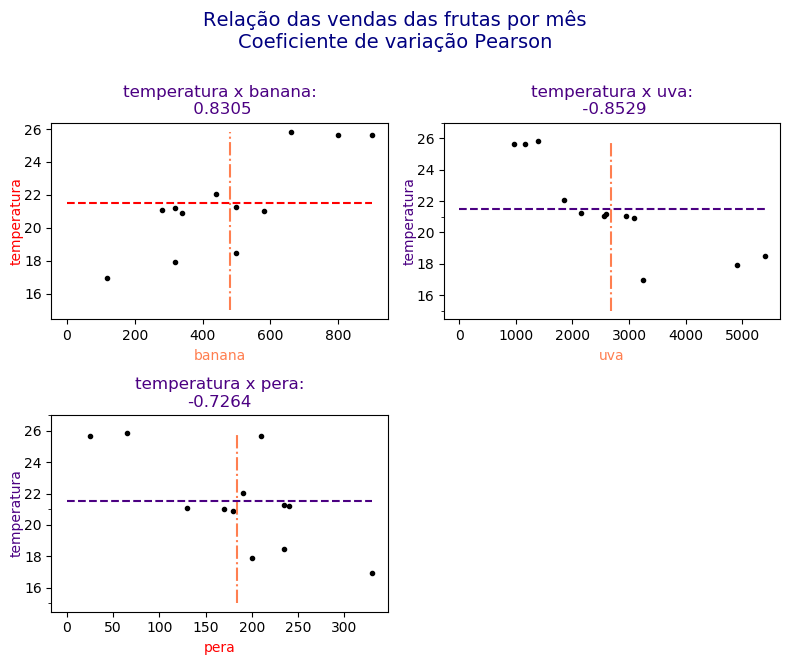

In [101]:
fig,ax = plt.subplots(2,2, figsize=[8,6])
ax[0,0].plot(banana,temperatura, marker='.', linestyle='none', color='black')
ax[0,0].plot([np.mean(banana),np.mean(banana)],[15,np.max(temperatura)], linestyle='-.', color='coral')
ax[0,0].plot([0,np.max(banana)],[np.mean(temperatura),np.mean(temperatura)], linestyle='--', color='red')
ax[0,0].set_xlabel('banana',color='coral')
ax[0,0].set_ylabel('temperatura', color='red', labelpad=0)

ax[0,0].set_title(f'temperatura x banana:\n {pearson_banana_temp}', color='indigo')


ax[0,1].plot(uva,temperatura, marker='.', linestyle='none', color='black')
ax[0,1].plot([np.mean(uva),np.mean(uva)],[15,np.max(temperatura)], linestyle='-.', color='coral')
ax[0,1].plot([0,np.max(uva)],[np.mean(temperatura),np.mean(temperatura)], linestyle='--', color='indigo')
ax[0,1].set_xlabel('uva', color='coral')
ax[0,1].set_ylabel('temperatura', color='indigo', labelpad=0)
ax[0,1].set_yticks([15,18,21,24,27],[15,18,21,24,27])
ax[0,1].set_title(f'temperatura x uva:\n {pearson_uva_temp}', color='indigo')

ax[1,0].plot(pera,temperatura, marker='.', linestyle='none',color='black')
ax[1,0].plot([np.mean(pera),np.mean(pera)],[15,np.max(temperatura)], linestyle='-.', color='coral')
ax[1,0].plot([0,np.max(pera)],[np.mean(temperatura),np.mean(temperatura)], linestyle='--', color='indigo')
ax[1,0].set_xlabel('pera', color='red')
ax[1,0].set_ylabel('temperatura', color='indigo', labelpad=0)
ax[1,0].set_yticks([15,18,21,24,27],[15,18,21,24,27])
ax[1,0].set_title(f'temperatura x pera:\n{pearson_pera_temp}', color='indigo')

ax[1,1].axis('off')
plt.yticks([15,18,21,24,27],[15,18,21,24,27])
plt.tight_layout()
plt.suptitle('Relação das vendas das frutas por mês\nCoeficiente de variação Pearson',y=1.1, fontsize=14, color='navy')



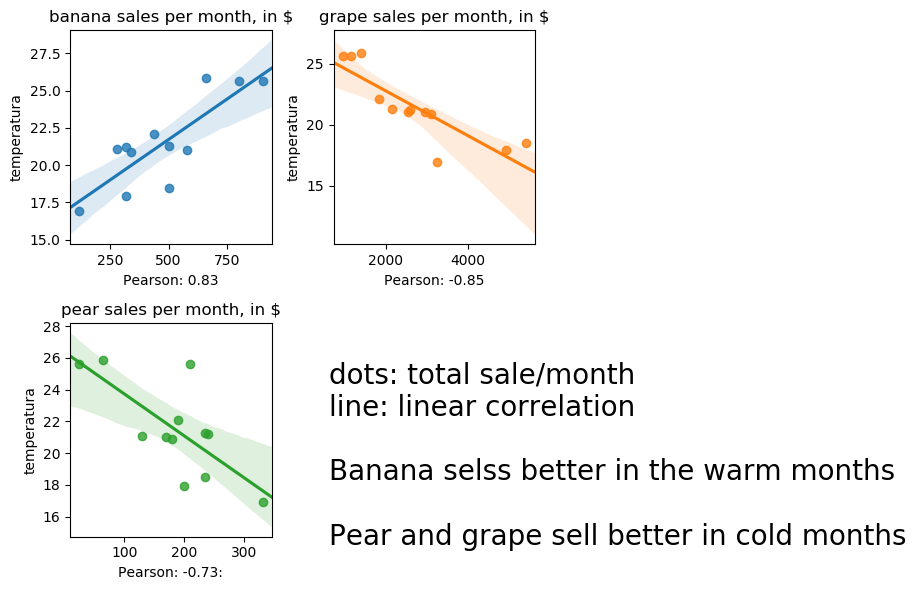

In [102]:
#agora, um jeito mil vezes mais fácil e bonito de fazer a mesma coisa:

fig,ax = plt.subplots(2,2, figsize=[8,6])
sns.regplot(x=banana, y=temperatura,ax=ax[0,0])
ax[0,0].set_xlabel(f'Pearson: %.2f'%np.corrcoef(banana,temperatura)[0][1])
sns.regplot(x=uva, y=temperatura,ax=ax[0,1])
ax[0,0].set_title('banana sales per month, in $')
ax[0,1].set_xlabel(f'Pearson: %.2f'%np.corrcoef(uva,temperatura)[0][1])
ax[0,1].set_title('grape sales per month, in $')
sns.regplot(x=pera, y=temperatura,ax=ax[1,0])
ax[1,0].set_xlabel(f'Pearson: %.2f:'%np.corrcoef(pera,temperatura)[0][1])
ax[1,0].set_title('pear sales per month, in $')
plt.tight_layout(True)
#plt.suptitle('Correlation  between temperature and sales per fruit \nand the Pearson coefficient')
ax[1,1].axis('off')
ax[1,1].text(-1,-1,'dots: total sale/month\nline: linear correlation\n\n\
Banana selss better in the warm months\n\nPear and grape sell better in cold months', fontsize=20)
#fig.set_size_inches(10, 12)
plt.ylim(0,25)
plt.tight_layout()


# Gerar números aleatórios 

In [103]:
#np.random.seed: faz com que sempre os mesmos números aleatórios sejam gerados
import numpy as np
np.random.seed(42)
[round(np.random.random(),4) for x in range(5)]

[0.3745, 0.9507, 0.732, 0.5987, 0.156]

In [104]:
np.random.seed(42)
[round(np.random.random(),4) for x in range(5)]

[0.3745, 0.9507, 0.732, 0.5987, 0.156]

In [105]:
np.random.seed(42)
[round(np.random.random(),4) for x in range(5)]

[0.3745, 0.9507, 0.732, 0.5987, 0.156]

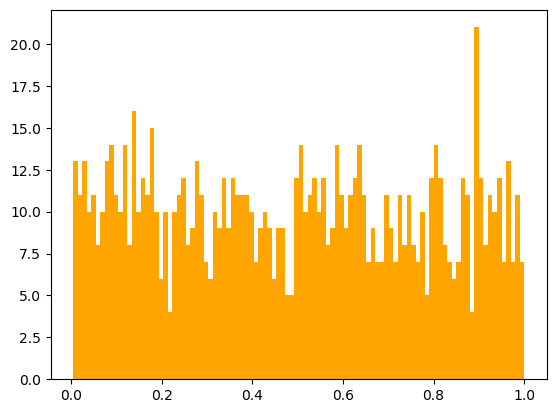

In [106]:
#gerar um monte de números aleatorios e plotar
random_numbers = np.empty(1000)
for i in range(1000):
    random_numbers[i] = np.random.random()
plt.hist(random_numbers, color='orange', bins=100)

plt.show()

### Bernoulli trials, ou binomial: 'cara ou coroa' com moeda 'zoada'

In [107]:
#vamos jogar cara ou coroa 10 vezes! Quantas vezes vai cair cara?
np.random.binomial(10,0.5)

6

In [108]:
#Não valeu! Você roubou! Melhor de três! 
#Vamos jogar melhor de 10 mais 2 vezes!
np.random.binomial(10,0.5,2)



array([6, 7])

In [109]:
#De novo! Vamos jogar 10x cara ou coroa! 
#Se der mais do que 7 caras, você ganha 10 reais
#Se der menos do que 7 caras, você me dá 5 reais!
#Vamos jogar 10 vezes!
np.random.seed(70)
resultados = np.random.binomial(10,0.5,10)
mais_que_7_caras = resultados>=7
menos_que_7_caras = resultados<7
print(f'Os resultados do jogo foram: {resultados}\n')
print(f'Destes resultados, estes foram 7 ou mais: {resultados[mais_que_7_caras]}\n')
print(f'E estes foram menores do que 7:  {resultados[menos_que_7_caras]}\n')
print(f'Logo, {np.sum(mais_que_7_caras)} vezes 10 dá {np.sum(mais_que_7_caras)*10}')
print(f'E 5 vezes {np.sum(menos_que_7_caras)} dá {np.sum(menos_que_7_caras)*5}')
print(f'Logo, vc me deve R${np.sum(mais_que_7_caras)*10-np.sum(menos_que_7_caras)*5},00,')


Os resultados do jogo foram: [7 7 5 7 4 3 7 5 5 5]

Destes resultados, estes foram 7 ou mais: [7 7 7 7]

E estes foram menores do que 7:  [5 4 3 5 5 5]

Logo, 4 vezes 10 dá 40
E 5 vezes 6 dá 30
Logo, vc me deve R$10,00,


In [110]:
resultados_milhao = np.random.binomial(10,0.5,int(1e6))
acima_de_sete_milhao = np.sum(resultados_milhao>=7)
abaixo_de_sete_milhao = np.sum(resultados_milhao<7)
print(f'se tivessemos jogado um milhão de vezes,\n',
    f"O n° de jogos com mais de 7 caras seria {'{:,}'.format(acima_de_sete_milhao)}",
      f"e com menos de 7 seria {'{:,}'.format(abaixo_de_sete_milhao)}")
      

se tivessemos jogado um milhão de vezes,
 O n° de jogos com mais de 7 caras seria 171,494 e com menos de 7 seria 828,506


914
9681
44117
116662
206269
246468
204395
116920
43728
9881
965


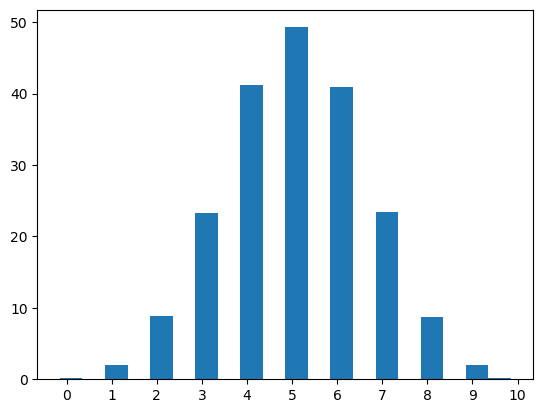

In [111]:
#bora plotar os resultados
plt.hist(resultados_milhao, density=True, bins=20)
plt.xticks(np.arange(0.15,11.15),np.arange(0,11))
plt.yticks(ticks=np.arange(0,0.6,0.1),labels= np.arange(0,60,10))

print(np.sum(resultados_milhao == 0))
print(np.sum(resultados_milhao == 1))
print(np.sum(resultados_milhao == 2))
print(np.sum(resultados_milhao == 3))
print(np.sum(resultados_milhao == 4))
print(np.sum(resultados_milhao == 5))
print(np.sum(resultados_milhao == 6))
print(np.sum(resultados_milhao == 7))
print(np.sum(resultados_milhao == 8))
print(np.sum(resultados_milhao == 9))
print(np.sum(resultados_milhao == 10))
plt.show()

In [167]:
import calendar

In [179]:
a = calendar.Calendar.monthdatescalendar(year = 2018, month = 'July' )

TypeError: monthdatescalendar() missing 1 required positional argument: 'self'

In [195]:
import calendar
print(calendar.month(2019,7))

     July 2019
Mo Tu We Th Fr Sa Su
 1  2  3  4  5  6  7
 8  9 10 11 12 13 14
15 16 17 18 19 20 21
22 23 24 25 26 27 28
29 30 31



In [192]:
print(calendar.calendar(2019))

                                  2019

      January                   February                   March
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
    1  2  3  4  5  6                   1  2  3                   1  2  3
 7  8  9 10 11 12 13       4  5  6  7  8  9 10       4  5  6  7  8  9 10
14 15 16 17 18 19 20      11 12 13 14 15 16 17      11 12 13 14 15 16 17
21 22 23 24 25 26 27      18 19 20 21 22 23 24      18 19 20 21 22 23 24
28 29 30 31               25 26 27 28               25 26 27 28 29 30 31

       April                      May                       June
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
 1  2  3  4  5  6  7             1  2  3  4  5                      1  2
 8  9 10 11 12 13 14       6  7  8  9 10 11 12       3  4  5  6  7  8  9
15 16 17 18 19 20 21      13 14 15 16 17 18 19      10 11 12 13 14 15 16
22 23 24 25 26 27 28      20 21 22 23 24 25 26      17 18 19 20 21 22 23
29 30                     

In [194]:
calendar.weekday(2019,3)

TypeError: weekday() missing 1 required positional argument: 'day'